In [ ]:
# This notebook implements the Azure Computer Vision OCR API
# https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/home#OCR

In [158]:
# import libraries
import time 
import requests
import cv2
import operator
import numpy as np
import os
import sys
from IPython.display import Image

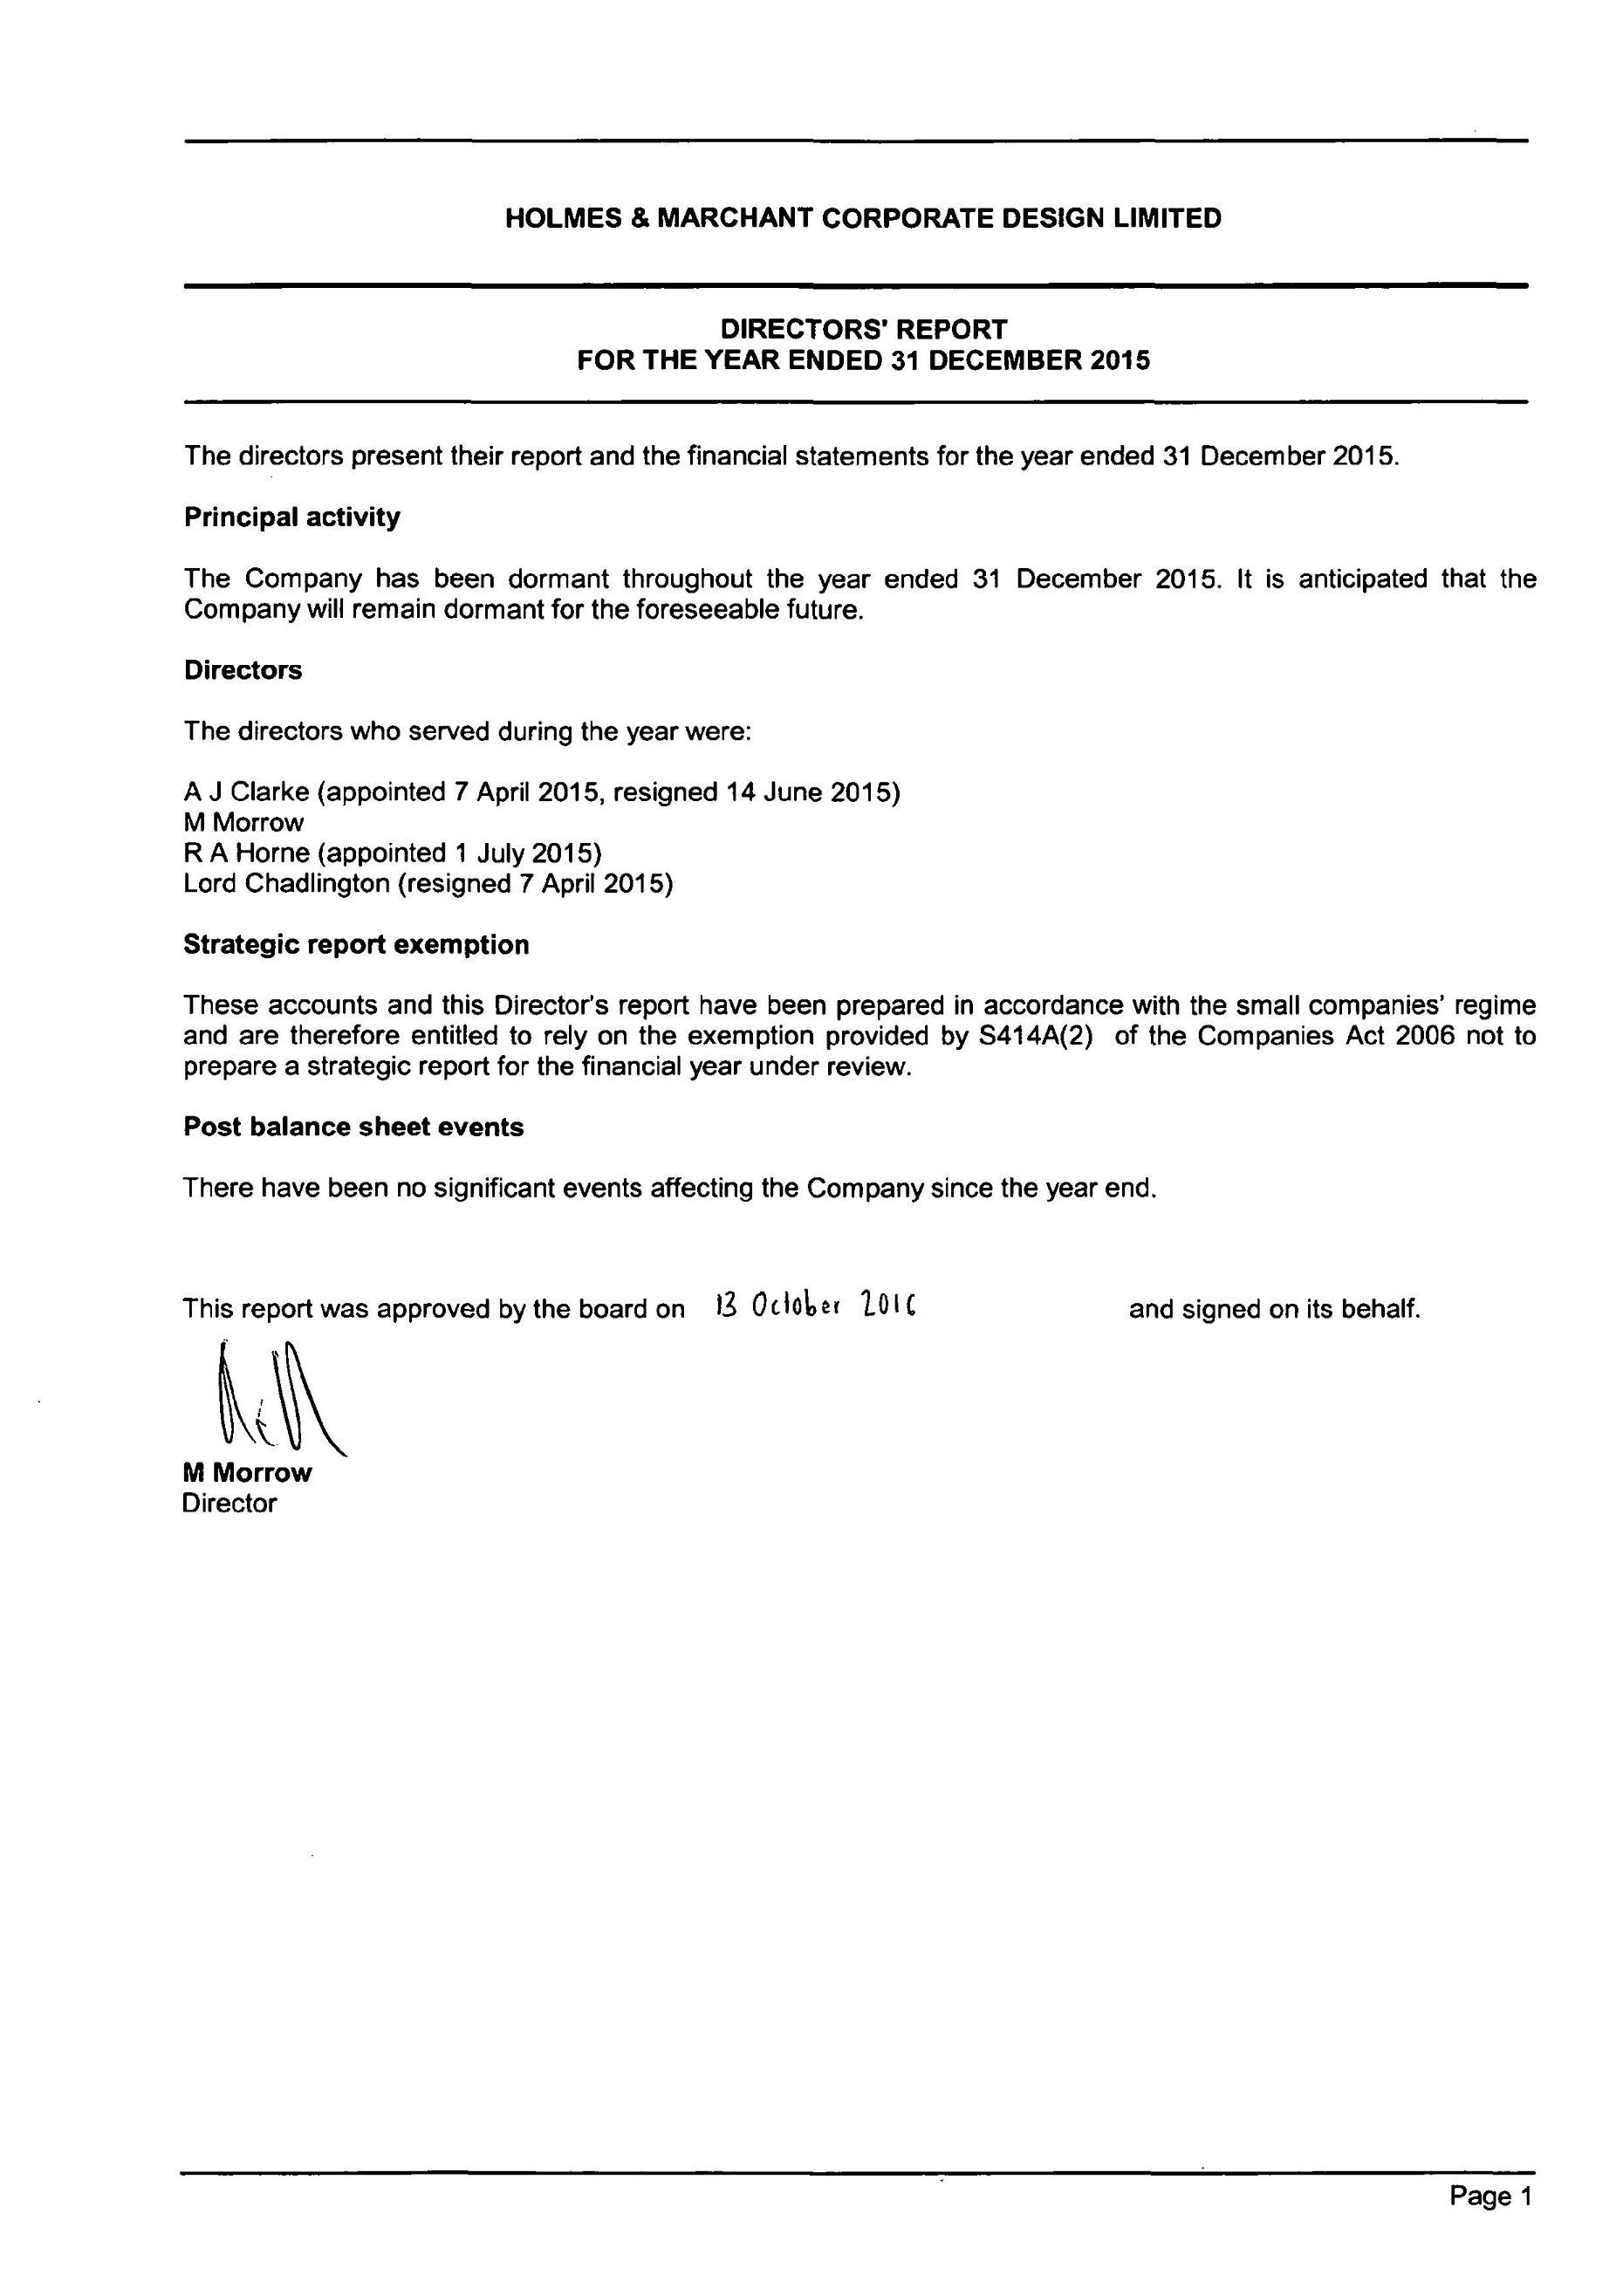

In [162]:
# Variables to use when calling the Azure API
# https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc
_url = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr' # the OCR part of the API
# _url = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/RecognizeText' # the handwriting part of the API
_key = "0205e6a47acb439b90f629bd8bd041e8"  #Here you have to paste your primary key
_maxNumRetries = 10
_document = r'C:/Users/virtualmachine2/cog_vision/01883182_accounts_2015-12-31-4.jpg' # where the jpg is stored
Image(_document) # dispaly the doc in the notebook

In [ ]:
# Helper Function from Microsoft Notebook at link below to help us call the API cleanly
# https://github.com/Microsoft/Cognitive-Vision-Python/blob/master/Jupyter%20Notebook/Handwriting%20OCR%20API%20Example.ipynb
    
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:
        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429:
            print( "Message: %s" % ( response.json() ) )
            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break
        elif response.status_code == 202:
            result = response.headers['Operation-Location']
        else:
            print( "Error code: %d" % ( response.status_code ) )
        #    print( "Message: %s" % ( response.json() ) )
        break
        
    return response.json()

In [152]:
# Put all the image file names that sit in a folder into a list to loop through later with the oCR API 
filecontainer = [] # stores the image filenames
image_path = "C:/Users/virtualmachine2/cog_vision/images/" # your folder that holds the images

# Loop through items in folder and append to list filecontainer
for item in os.listdir(image_path):
    filecontainer.append((os.path.join(image_path,item)))
    
print(filecontainer) # print out list of image file names

['C:/Users/virtualmachine2/cog_vision/images/01883182_accounts_2015-12-31-4 - Copy (2).jpg', 'C:/Users/virtualmachine2/cog_vision/images/01883182_accounts_2015-12-31-4 - Copy (3).jpg', 'C:/Users/virtualmachine2/cog_vision/images/01883182_accounts_2015-12-31-4 - Copy (4).jpg', 'C:/Users/virtualmachine2/cog_vision/images/01883182_accounts_2015-12-31-4 - Copy (5).jpg', 'C:/Users/virtualmachine2/cog_vision/images/01883182_accounts_2015-12-31-4 - Copy (6).jpg', 'C:/Users/virtualmachine2/cog_vision/images/01883182_accounts_2015-12-31-4 - Copy.jpg']


In [153]:
# This is a function that is used below to find and extract specific elemnts of the dictionary
# that the API call creates later. It is from this GitHub Gist:
# https://gist.github.com/douglasmiranda/5127251
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [163]:
# Computer Vision API parameters that the API call will use via the function processRequest()
params = {'handwriting' : 'true'}
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'
json = None

# Create a blank list to hold all the flattened text from each API call for each document
API_call_flat = []

# Loop through all the image file names in filecontainer calling the API for each one 
for i in filecontainer:
    # Load raw image file into memory
    pathToFileInDisk = i
    with open(pathToFileInDisk, 'rb') as f:
        data = f.read()
    # Send the image to the Azure API         
    API_call = (processRequest(json, data, headers, params))
   #Flatten out just the words using the find() function above and append it to the list API_call_flat     
    API_call_flat.append(list(find('text', API_call)))
    
# This prints out "Error code: 200" that means success

Error code: 200
Error code: 200
Error code: 200
Error code: 200
Error code: 200
Error code: 200


In [156]:
# Just look at the words of the first image in the list of all the images
API_call_flat[0] 

['HOLMES',
 '&',
 'MARCHANT',
 'CORPORATE',
 'DESIGN',
 'LIMITED',
 "DIRECTORS'",
 'REPORT',
 'FOR',
 'THE',
 'YEAR',
 'ENDED',
 '31',
 'DECEMBER',
 '2015',
 'The',
 'directors',
 'present',
 'their',
 'report',
 'and',
 'the',
 'financial',
 'statements',
 'for',
 'the',
 'year',
 'ended',
 '31',
 'December',
 '2015.',
 'Principal',
 'activity',
 'The',
 'Company',
 'has',
 'been',
 'dormant',
 'throughout',
 'the',
 'year',
 'ended',
 '31',
 'December',
 '2015.',
 'It',
 'is',
 'anticipated',
 'that',
 'the',
 'Company',
 'will',
 'remain',
 'dormant',
 'for',
 'the',
 'foreseeable',
 'future.',
 'Directors',
 'The',
 'directors',
 'who',
 'served',
 'during',
 'the',
 'year',
 'were:',
 'A',
 'J',
 'Clarke',
 '(appointed',
 '7',
 'April',
 '2015,',
 'resigned',
 '14',
 'June',
 '2015)',
 'M',
 'Morrow',
 'R',
 'A',
 'Horne',
 '(appointed',
 '1',
 'July',
 '2015)',
 'Lord',
 'Chadlington',
 '(resigned',
 '7',
 'April',
 '2015)',
 'Strategic',
 'report',
 'exemption',
 'These',
 'acco

In [159]:
# From the Dictionary the API call creates, use the syntax below to pick out specific
API_call["regions"][0]["lines"][0]["words"][0]["text"]
# regions is a dict containing lots of info about that box 
# The next list element tells us which box we are in
# lines is little boxes around lines with coordindates plus content, i.e. short word sequence
# The next list element pulls out the coodinates and line for each line, e.g. [0] is first line in the first section
# words is a dictionary containing word coordinates for each word
# Text returns a single word

'HOLMES'